In [10]:
import requests
from pprint import pprint
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress

In [11]:
# tip 2: print the type of the response
#type(response)

In [12]:
# tip 3: print the keys of a dictionary
#response.keys()

# Bank Asset Data

In [13]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [14]:
bank_asset= requests.get(five_bank_asset_url).json()
pprint(bank_asset)

{'data': [{'data': {'AOA': 49332000,
                    'ASSET': 490799000,
                    'BKPREM': 602000,
                    'CERT': 33124,
                    'CHBAL': 122935000,
                    'FREPO': 68655000,
                    'ID': '33124_20230331',
                    'INTAN': 1890000,
                    'LNLSNET': 157130000,
                    'LNRE': 26899000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'ORE': 0,
                    'REPDTE': '20230331',
                    'SC': 32751000,
                    'TRADE': 57504000},
           'score': 0},
          {'data': {'AOA': 112474000,
                    'ASSET': 2518290000,
                    'BKPREM': 19403000,
                    'CERT': 3510,
                    'CHBAL': 365662000,
                    'FREPO': 40359000,
                    'ID': '3510_20230331',
                    'INTAN': 58620000,
                    'LNLSNET': 1030410000,
                    'LNRE'

In [15]:
# tip 2: print the type of the response
type(bank_asset)

dict

In [16]:
# tip 3: print the keys of a dictionary
bank_asset.keys()

dict_keys(['meta', 'data', 'totals'])

In [17]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [18]:
new_data = pd.DataFrame(Combined_assetdata)
#new_data

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_asset

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,195686000,4553000,348000,18532000,81484000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,2586000,0,0,4000,7488000
2,20120630,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,412263790,10253110,2501993,63950326,105268172
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,275976000,10424000,2050000,35762000,116341000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,22526845,126297,3490,168475,1710899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,551018000,610041000,364136000,1118613000,382261000,23451000,206000,48371000,196961000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,13159283,34313041,0,172508687,142800644,1734733,0,203723,10971889
261,20230331,WELLS FARGO BANK NA,3511,1687507000,160472000,412394000,42255000,898858000,400457000,10555000,214000,32480000,72473000
262,20230331,BANK OF AMERICA NA,3510,2518290000,365662000,763775000,40359000,1030410000,325560000,19403000,283000,58620000,112474000


##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [19]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]
new_bank_asset.tail(6)

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
258,20230331,CITIBANK NATIONAL ASSN,7213,1721547000,320187000,470731000,74700000,614300000,170027000,12097000,16000,13881000,87740000,790918000,0.459423
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,551018000,610041000,364136000,1118613000,382261000,23451000,206000,48371000,196961000,1161059000,0.355285
260,20230331,FIRST REPUBLIC BANK,59017,232944161,13159283,34313041,0,172508687,142800644,1734733,0,203723,10971889,47472324,0.203793
261,20230331,WELLS FARGO BANK NA,3511,1687507000,160472000,412394000,42255000,898858000,400457000,10555000,214000,32480000,72473000,572866000,0.339475
262,20230331,BANK OF AMERICA NA,3510,2518290000,365662000,763775000,40359000,1030410000,325560000,19403000,283000,58620000,112474000,1129437000,0.448494
263,20230331,GOLDMAN SACHS BANK USA,33124,490799000,122935000,32751000,68655000,157130000,26899000,602000,0,1890000,49332000,155686000,0.317209


In [20]:
#create a stack bar chart with the compositon of the asset.
#Total Asset= Cash and Balances due from Depository Institutions+Securities+Net Loans Lease+Federal funds sold & revenue repurchase agreements +Trading account assets + Banking premises and fixed assets+ Other real estate owned+ Goodwill and other intangibles+All other assets

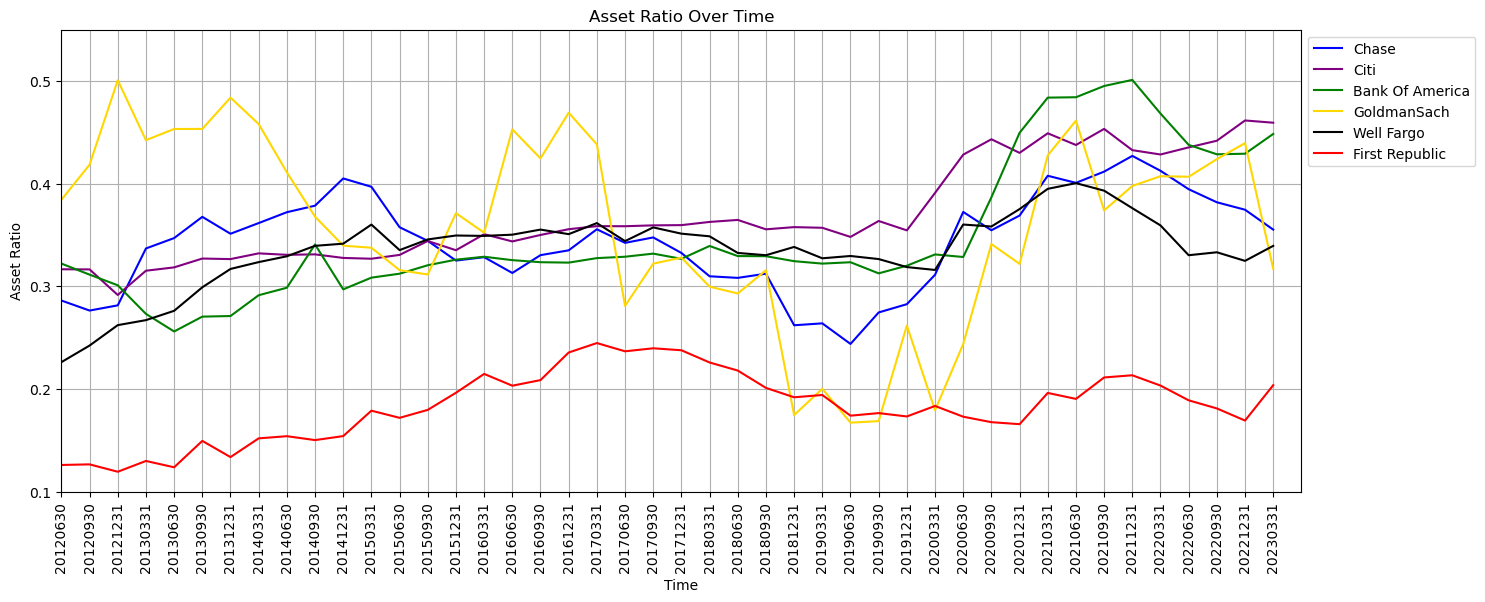

In [21]:
#Plot current asset ratio over time for the six banks, time=np.arange(1,len(new_bank_asset["Reporting Date"].unique())+1,1)
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation="vertical")
# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

In [22]:
#Create a pie chart of the Chase's avg current asset and other assets


# Bank Liabilities

In [23]:
bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [24]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
pprint(Bank_liabilites)

{'data': [{'data': {'ALLOTHL': 35566000,
                    'CERT': 33124,
                    'DEP': 337173000,
                    'DEPDOM': 324813000,
                    'DEPFOR': 12360000,
                    'EQTOT': 50422000,
                    'FREPP': 24000000,
                    'ID': '33124_20230331',
                    'LIAB': 440377000,
                    'LIABEQ': 490799000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'OTHBRF': 9660000,
                    'REPDTE': '20230331',
                    'TRADEL': 31706000},
           'score': 0},
          {'data': {'ALLOTHL': 41508000,
                    'CERT': 3510,
                    'DEP': 2015381000,
                    'DEPDOM': 1903082000,
                    'DEPFOR': 112299000,
                    'EQTOT': 232471000,
                    'FREPP': 141110000,
                    'ID': '3510_20230331',
                    'LIAB': 2285819000,
                    'LIABEQ': 2518290000,
 

In [25]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total EquityCapital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds
                                  })
     

In [26]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)
#new_data

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_liabilites

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total EquityCapital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,1192463000,950510000,386149000,564361000.0,56476000,155378000,21726000,60983000,102768000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,94738000,53774000,53774000,0.0,9878000,19955000,16745000,13822000,519000
2,20120630,BANK OF AMERICA NA,3510,1445093157,1265806391,1062273625,991685005,70588620.0,25374938,179286766,80222077,40184413,39536551
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,1676378000,1162998000,832455000,330543000.0,80160000,136447000,188478000,128307000,87465000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,27930388,24215303,24215303,NaN,431367,3056613,0,15791,3203581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000
262,20230331,BANK OF AMERICA NA,3510,2518290000,2285819000,2015381000,1903082000,112299000.0,41508000,232471000,141110000,29893000,56413000


# Bank Performace 

In [27]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [28]:
bank_performace=requests.get(bank_performance_url).json()
pprint(bank_performace)

{'data': [{'data': {'CERT': 33124,
                    'DEPDASTR': 66.18,
                    'EEFFR': 42.61487964989059,
                    'ID': '33124_20230331',
                    'IDLNCORR': 64.20702505679868,
                    'IDT1RWAJR': 13.598852660054359,
                    'LNLSDEPR': 46.60218938052572,
                    'LNLSNTV': 32.02,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'NIMY': 2.1266688279154753,
                    'RBC1AAJ': 9.776439756905367,
                    'REPDTE': '20230331',
                    'ROA': 1.3532890282542038,
                    'ROE': 13.41},
           'score': 0},
          {'data': {'CERT': 3510,
                    'DEPDASTR': 75.57,
                    'EEFFR': 52.53852097631926,
                    'ID': '3510_20230331',
                    'IDLNCORR': 55.169138563463974,
                    'IDT1RWAJR': 13.347971635290307,
                    'LNLSDEPR': 51.127305457380025,
                    

In [29]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to CoreDeposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [30]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to CoreDeposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
0,20120630,CITIBANK NATIONAL ASSN,7213,3.801293,0.910206,0.910206,57.158555,42.58,42.58,184.903162,28.65,15.240706
1,20120630,GOLDMAN SACHS BANK USA,33124,0.594831,1.314566,1.314566,29.320988,12.04,12.04,58.566582,46.89,18.345798
2,20120630,BANK OF AMERICA NA,3510,2.657255,0.952095,0.952095,64.680503,48.64,48.64,74.325034,68.62,12.863604
3,20120630,JPMORGAN CHASE BANK NA,628,2.323562,0.683181,0.683181,79.750202,32.78,32.78,75.544175,45.92,9.121593
4,20120630,FIRST REPUBLIC BANK,59017,4.203551,1.285897,1.285897,50.839580,80.79,80.79,107.527984,78.15,13.680957
...,...,...,...,...,...,...,...,...,...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,628,3.037683,1.448429,1.448429,49.889716,34.23,34.23,59.124465,62.54,17.263379
260,20230331,FIRST REPUBLIC BANK,59017,1.697503,0.483146,0.483146,68.120847,74.06,74.06,294.056164,44.85,11.673376
261,20230331,WELLS FARGO BANK NA,3511,3.596714,1.413670,1.413670,56.405511,53.27,53.27,68.612129,82.24,12.240646
262,20230331,BANK OF AMERICA NA,3510,2.806533,1.343057,1.343057,52.538521,40.92,40.92,55.169139,75.57,13.347972


# Bank Correlation

In [48]:
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))

In [49]:
# Read the original CSV file of consumer sentiment index
consumer_index = pd.read_csv("Resources/us_csi_original.csv")

In [50]:
#Rename the header of column and reset index
renamed_consumer_index = consumer_index.rename(columns = {"UMCSENT" : "Consumer Sentiment Index"})

#Formatting consumer sentiment index
renamed_consumer_index["Consumer Sentiment Index"] = renamed_consumer_index["Consumer Sentiment Index"].map("{:,.3f}".format)

#Display consumer index dataframe
renamed_consumer_index.head()

,DATE,Consumer Sentiment Index
0,2012-04-01,76.300
1,2012-07-01,74.967
2,2012-10-01,79.400
3,2013-01-01,76.667
4,2013-04-01,81.667


In [ ]:
# Correlation graph 1 (Net loans and leases)


In [ ]:
# Correlation graph 2 (Deposit held in domestic offices)
